# Introduction to data analytics with pandas

### Quentin Caudron, PhD

#### PyData Seattle, July 2017

## A little about me

- Lapsed computational physicist
- PhD computational neuroscience, postdoc statistical epidemiology
- Data Scientist at CBRE - *we're hiring*



## Systems check

Do you have a working Python installation, with the `pandas` package ?

In [1]:
import pandas as pd

This cell should run without raising a traceback. Assuming it runs, you can also try printing the value of `pd.__version__` to see what version of `pandas` you have installed.

## A little about this workshop

We'll be analysing a real-world dataset together. It's about my favourite thing in the world : **coffee**.

This dataset was collected at the Mathematics Institute at the University of Warwick. It's a time-series dataset, describing the **total number of coffees made by our espresso machine**.

Slides are available at https://github.com/QCaudron/pydata_pandas. One notebook contains solutions; beware of spoilers.

## A little about the hero of this story

<img src="images/coffee_machine.jpg" width="400px" />

This little machine was able to tell us how many coffees it had made to date, with the punch of three buttons. My friends and I entered this value into a mobile app when we got a coffee.

## Let's begin

In [2]:
import pandas as pd
%matplotlib inline  # if you're on a Jupyter notebook

The second line here tells `matplotlib` to plot directly under the cell where any plotting code is called. `pandas` uses `matplotlib` to generate graphs, and without this, the graphs would appear outside the Jupyter notebook when you called `plt.show()` - but we just want them to appear without having to do this.

## Importing the data

Let's import the coffee data from CSV.

In [3]:
data = pd.read_csv("data/coffees.csv")
pd.read

`pandas` can read from many data formats : CSV, JSON, Excel, HDF5, SQL, and more.

#### What does this data look like ?

In [4]:
data

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
5,2011-10-05 13:15:00,481.0,Quentin
6,2011-10-06 07:21:00,503.0,Anthony
7,2011-10-06 10:04:00,513.0,Quentin
8,2011-10-06 12:14:00,539.0,Mike
9,2011-10-06 12:49:00,540.0,Quentin


#### Let's just look at the first few rows.

In [25]:
data.head()

,timestamp,coffees,contributor
timestamp,,,
2011-10-03 08:22:00,2011-10-03 08:22:00,397,Quentin
2011-10-04 11:48:00,2011-10-04 11:48:00,410,Quentin
2011-10-05 10:47:00,2011-10-05 10:47:00,464,Quentin
2011-10-05 13:15:00,2011-10-05 13:15:00,481,Quentin
2011-10-06 07:21:00,2011-10-06 07:21:00,503,Anthony


`df.head(n=10)` would show the first ten rows. The default is `n=5`.

We have an index, and three columns : `timestamp`, `coffees`, and `contributor`.

Uh-oh. Why is there a string of text, `testing`, in our coffee numbers ? What's going on in the `coffees` column in the row after that ?

#### Let's look at that string in the third row of the `coffees` column.

In [6]:
data.loc[2]

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

Definitely a string. We'll note this as something to fix after we finish looking around.

#### We should also take a look at that NaN. In fact, let's look at the first five values in `coffees`.

In [7]:
data.coffees[:5]

0      397.0
1      410.0
2    testing
3        NaN
4      464.0
Name: coffees, dtype: object

#### How long is the dataset ?

In [8]:
print("Dataset length :")

print(len(data))

Dataset length :
671


#### What else can we find out ?

In [9]:
data.describe()

,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2012-06-11 16:01:00,9134.0,Quentin
freq,1,2,367


Looks like we also have some missing data - we have 671 rows, but the `coffees` column only has 659 entries.

In [10]:
data[data.coffees.isnull()]

,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


#### What type of Python objects are the columns ?

In [11]:
data.dtypes

timestamp      object
coffees        object
contributor    object
dtype: object

The `contributor` column makes sense as `object`, but surely the `timestamp` should be a timestamp-type, and `coffees` should be numerical ?

## Cleaning the data

#### The `coffees` column should only contain numerical data.

We can cast the column to a numeric type, forcing anything non-numeric to NaN.

In [12]:
data.coffees = pd.to_numeric(data.coffees, errors="coerce")

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


#### The `coffees` column contains NaNs.

Let's drop them, and then cast the column to integers rather than floats.

In [13]:
data.dropna(subset=["coffees"], inplace=True)

data.coffees = data.coffees.astype(int)
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


#### Let's have pandas parse the `timestamp` strings to datetime objects. 

In [14]:
data.timestamp = pd.to_datetime(data.timestamp)
data.dtypes

timestamp      datetime64[ns]
coffees                 int32
contributor            object
dtype: object

#### So where do we stand ?

In [15]:
data.describe(include="all")

,timestamp,coffees,contributor
count,657,657.000000,657
unique,657,NaN,9
top,2011-10-24 14:32:00,NaN,Quentin
freq,1,NaN,361
first,2011-10-03 08:22:00,NaN,NaN
last,2013-09-13 10:28:00,NaN,NaN
mean,NaN,8568.471842,NaN
std,NaN,4600.215049,NaN
min,NaN,397.000000,NaN
25%,NaN,4986.000000,NaN


## Exploratory analysis

#### Let's begin by visualising the coffee counts.

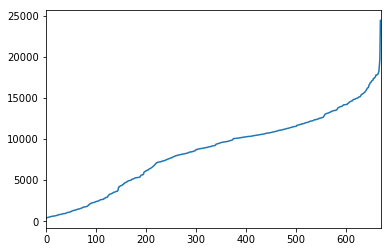

In [16]:
data.coffees.plot()

`pandas` is plotting the coffees against the index, which is just a series of integers.

#### Let's set the timestamp column as the dataframe's index.

In [17]:
data.index = data.timestamp
data.head()

,timestamp,coffees,contributor
timestamp,,,
2011-10-03 08:22:00,2011-10-03 08:22:00,397,Quentin
2011-10-04 11:48:00,2011-10-04 11:48:00,410,Quentin
2011-10-05 10:47:00,2011-10-05 10:47:00,464,Quentin
2011-10-05 13:15:00,2011-10-05 13:15:00,481,Quentin
2011-10-06 07:21:00,2011-10-06 07:21:00,503,Anthony


We now have the timestamp in two places, but that's OK, we can ignore it for now.

#### Shall we try plotting again ?

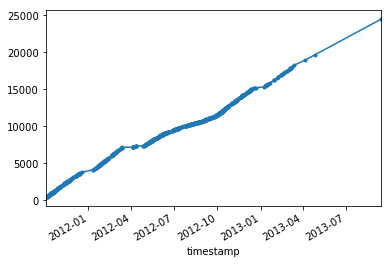

In [18]:
data.coffees.plot(style=".-")

We have some very uneven spacing in places. We should 